Download the dataset from:  https://github.com/bellawillrise/Introduction-to-Numerical-Computing-in-Python/

Submit a pdf file, which is a rendered saved version of the jupyter notebook.  Make sure to execute all the codes so the output can be viewed in the pdf. 

Also include the link to the public github repository where the jupyter notebook for the assignment is uploaded. 

Link to the github repository: <</insert link>>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# %matplotlib inline

In [5]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [7]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

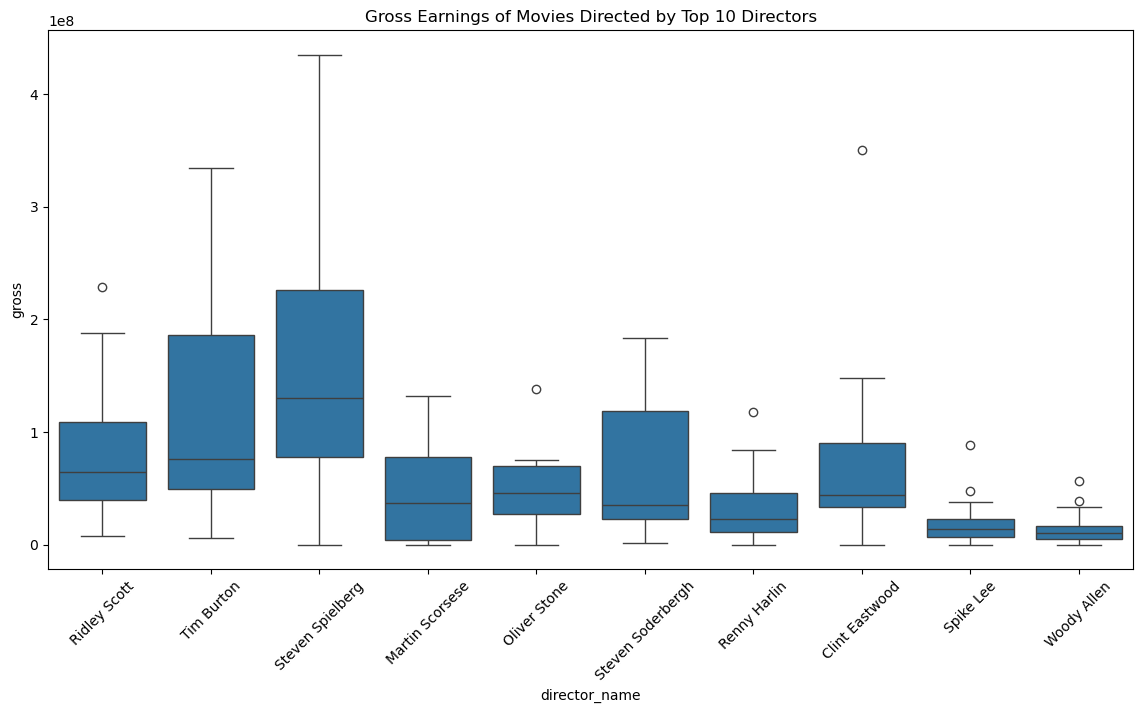

In [75]:
# Get all directors name
top_directors = data['director_name']

# Filter out director with no name
top_directors = top_directors[top_directors != '0']

# Get the top 10 directors
top_directors = top_directors.value_counts().nlargest(10).index

# Get the data of the top 10 directors
top_directors_data = data[data['director_name'].isin(top_directors)]

# Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='director_name', y='gross', data=top_directors_data)
plt.title('Gross Earnings of Movies Directed by Top 10 Directors')
plt.xticks(rotation=45)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

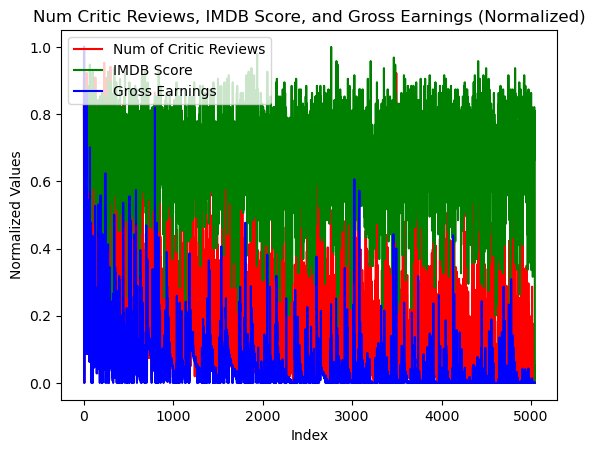

In [79]:
# Create an array for X-axis based on the number of data points
X = np.arange(len(data))

# Normalize the variables (0 to 1 scale)
y = data['num_critic_for_reviews'] / data['num_critic_for_reviews'].max()
z = data['imdb_score'] / data['imdb_score'].max()
w = data['gross'] / data['gross'].max()

# Plotting all three variables simultaneously
plt.plot(X, y, color='r', label='Num of Critic Reviews')
plt.plot(X, z, color='g', label='IMDB Score')
plt.plot(X, w, color='b', label='Gross Earnings')

# Naming the x-axis, y-axis, and the whole graph
plt.xlabel("Index")
plt.ylabel("Normalized Values")
plt.title("Num Critic Reviews, IMDB Score, and Gross Earnings (Normalized)")

# Adding a legend
plt.legend()

# To load the display window
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [99]:
data['sales'] = data['gross'] - data['budget']
data['sales'].head()

0    523505847.0
1      9404152.0
2    -44925825.0
3    198130642.0
4            0.0
Name: sales, dtype: float64

## Which directors garnered the most total sales?

In [112]:
# Group by director and sum the sales
director_sales = data.groupby('director_name')['sales'].sum()

# Sort the results in descending order to find the directors with the most total sales
top_directors_by_sales = director_sales.sort_values(ascending=False)

top_directors_by_sales.head()

director_name
Steven Spielberg    2.451332e+09
George Lucas        1.386641e+09
James Cameron       1.199626e+09
Joss Whedon         1.000887e+09
Chris Columbus      9.417076e+08
Name: sales, dtype: float64

## Plot sales and average likes as a scatterplot. Fit it with a line.

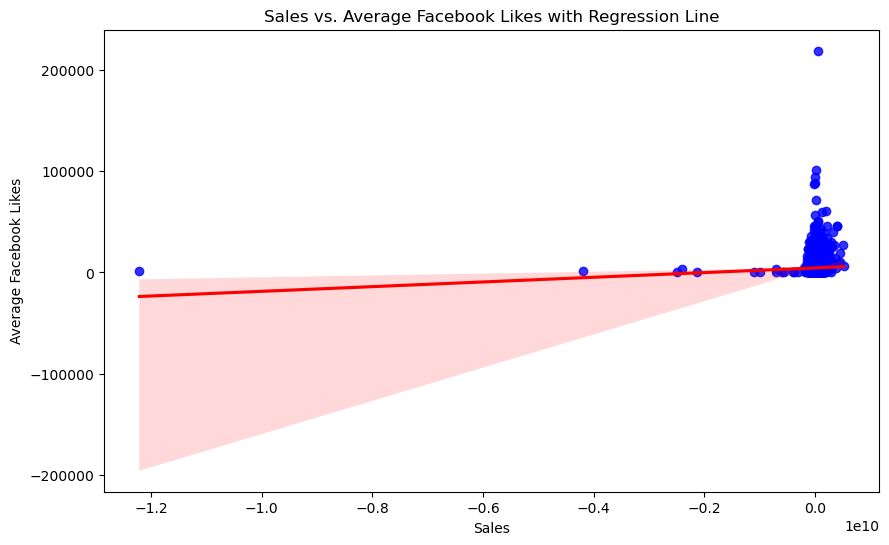

In [150]:
# Calculate and plot the scatterplot with regression line directly
plt.figure(figsize=(10, 6))
sns.regplot(
    x=data['sales'], 
    y=data[['director_facebook_likes', 
            'actor_1_facebook_likes', 
            'actor_2_facebook_likes', 
            'actor_3_facebook_likes', 
            'cast_total_facebook_likes', 
            'movie_facebook_likes']].mean(axis=1), 
    scatter_kws={'color': 'blue'}, 
    line_kws={'color': 'red'}
)

# Labels and title
plt.xlabel('Sales')
plt.ylabel('Average Facebook Likes')
plt.title('Sales vs. Average Facebook Likes with Regression Line')

# Show plot
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

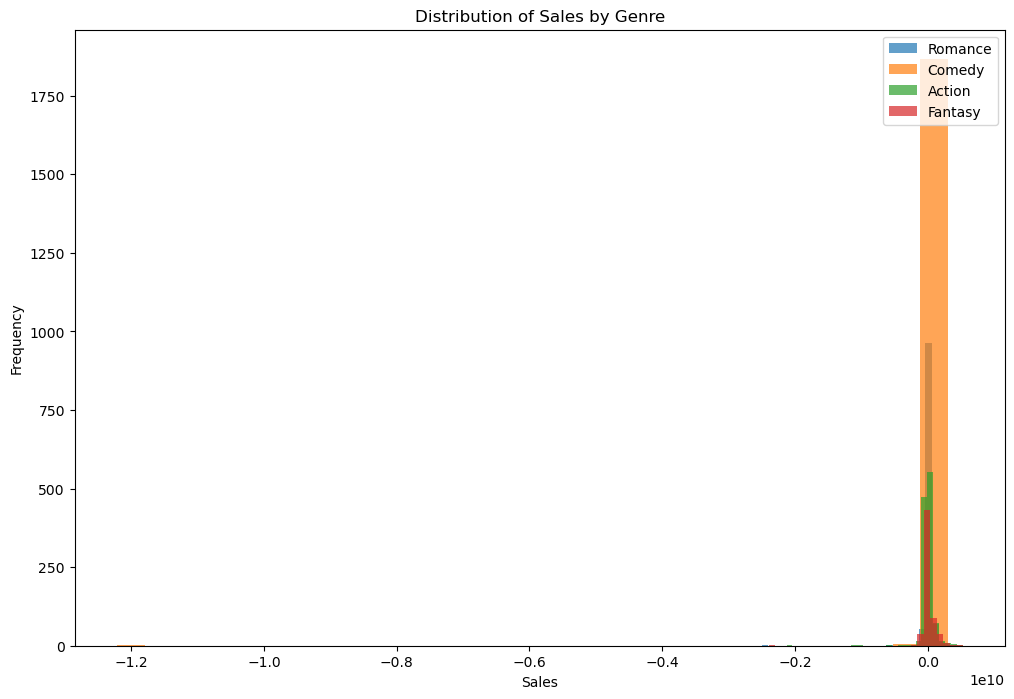

In [147]:
# Define the genres of interest
genres_of_interest = ['Romance', 'Comedy', 'Action', 'Fantasy']

# Create a plot
plt.figure(figsize=(12, 8))

# Plot histograms for each genre
for genre in genres_of_interest:
    # Filter the data for the current genre
    genre_data = data[data['genres'].str.contains(genre, na=False)]['sales']
    # Plot histogram
    plt.hist(genre_data, bins=30, alpha=0.7, label=genre)

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales by Genre')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [159]:
# Compute the average likes for the three actors and store it in a new column
data['average_actor_likes'] = data[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].mean(axis=1)

data['average_actor_likes']

0         930.333333
1       15333.333333
2        3851.333333
3       24333.333333
4          47.666667
            ...     
5039      584.333333
5040        0.000000
5041      718.000000
5042       41.666667
5043        0.000000
Name: average_actor_likes, Length: 5044, dtype: float64

## Copying the whole dataframe

In [161]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [163]:
# Step 2: Select numeric columns (excluding categorical and object types)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Apply Min-Max Normalization
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].min()) / (df[numeric_columns].max() - df[numeric_columns].min())

# Display the first few rows of the normalized DataFrame
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0.000000,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,0.000198,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,0.000397,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,0.020056,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,0.000595,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,0.020466,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,0.000793,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
